<a href="https://colab.research.google.com/github/Yospy/Multilingual-Detection-using-Naive-Bayes/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf

In [3]:
data = pd.read_csv("/content/Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
data.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [5]:
data.groupby('Language').count()

,Text
Language,
Arabic,536
Danish,428
Dutch,546
English,1385
French,1014
German,470
Greek,365
Hindi,63
Italian,698


In [6]:
data[data.Language == "Tamil"]

,Text,Language
2042,விக்கிப்பீடியா (Wikipedia; /ˌwɪkɪˈpiːdiə/ (கேட...,Tamil
2043,"தமிழ் விக்கிப்பீடியாவின் 1,00,000க்கும் மேற்பட...",Tamil
2044,"பெரும்பாலும் இதன் எல்லாக் கட்டுரைகளும், இதனைப்...",Tamil
2045,"[6] மேலும் இது கிட்டத்தட்ட 100,000 முனைப்பான ப...",Tamil
2046,"[7][8] சனவரி 2021 வரையில், விக்கிப்பீடியா 285 ...",Tamil
...,...,...
2506,"உங்கள் தவறு என்னவென்றால், அன்றிலிருந்து இன்றுவ...",Tamil
2507,நர்சிசா அவள் முதலில் போராடிய வழிகளை மாற்றினாள்...,Tamil
2508,எப்படி ' இப்போது நடந்த எல்லாவற்றையும் மரியான் ...,Tamil
2509,அவள் இனிமேல் தங்க ரொட்டியை விரும்ப மாட்டாள் என...,Tamil


In [7]:
from sklearn.model_selection import train_test_split
X = data.Text 
y = data.Language

In [16]:
from sklearn.preprocessing import LabelEncoder
normal = LabelEncoder()
y = normal.fit_transform(y)

In [17]:
normal.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [26]:
import re
data_list = []
for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          
    data_list.append(text)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()
X.shape

(10337, 39928)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [32]:
model.fit(X_train, y_train)

MultinomialNB()

In [33]:
model.score(X_test,y_test)

0.9782398452611218

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([8, 4, 3, ..., 9, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

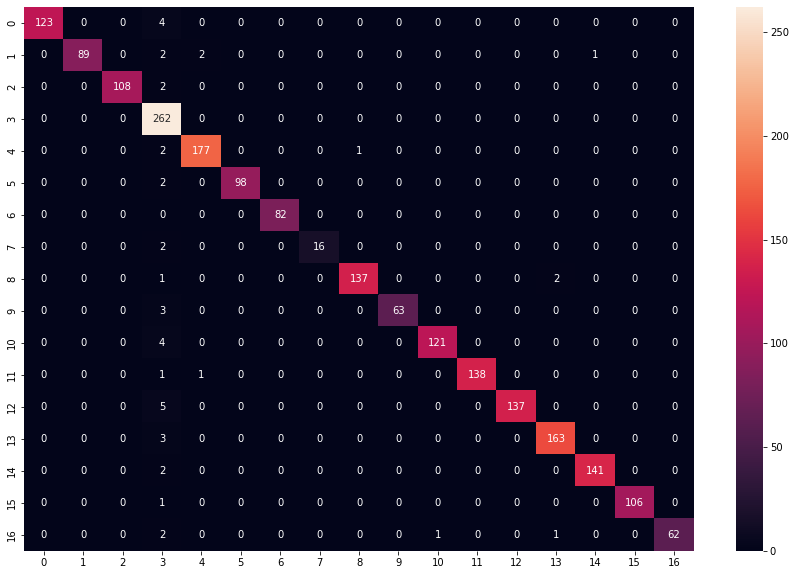

In [37]:
import seaborn as sn
plt.figure(figsize=(15,10))
sn.heatmap(cm, annot=True, fmt='d')

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       127
           1       1.00      0.95      0.97        94
           2       1.00      0.98      0.99       110
           3       0.88      1.00      0.94       262
           4       0.98      0.98      0.98       180
           5       1.00      0.98      0.99       100
           6       1.00      1.00      1.00        82
           7       1.00      0.89      0.94        18
           8       0.99      0.98      0.99       140
           9       1.00      0.95      0.98        66
          10       0.99      0.97      0.98       125
          11       1.00      0.99      0.99       140
          12       1.00      0.96      0.98       142
          13       0.98      0.98      0.98       166
          14       0.99      0.99      0.99       143
          15       1.00      0.99      1.00       107
          16       1.00      0.94      0.97        66

    accuracy              

In [49]:
def predict(text):
     x = cv.transform([text]).toarray() 
     lang = model.predict(x) 
     lang = normal.inverse_transform(lang) 
     print("The langauge is in",lang[0])

In [51]:
predict('டெர்ரி நீங்கள் உண்மையில் அந்த')

The langauge is in Tamil
